In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras import layers, models

latent_dim = 32

# Encoder as a Sequential block
encoder_block = models.Sequential([
    layers.Conv2D(16, (3,3), activation="relu", padding="same", strides=2),
    layers.Conv2D(8,  (3,3), activation="relu", padding="same", strides=2),
    layers.Flatten(),
    layers.Dense(latent_dim)
], name="encoder_block")

# Decoder as a Sequential block
decoder_block = models.Sequential([
    layers.Dense(7*7*8, activation="relu"),
    layers.Reshape((7,7,8)),
    layers.Conv2DTranspose(8,  (3,3), strides=2, padding="same", activation="relu"),
    layers.Conv2DTranspose(16, (3,3), strides=2, padding="same", activation="relu"),
    layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")
], name="decoder_block")

# Functional wiring (define input explicitly, then call the blocks)
inputs = layers.Input(shape=(28, 28, 1), name="img_input")
z = encoder_block(inputs)
outputs = decoder_block(z)

autoencoder = models.Model(inputs, outputs, name="autoencoder")
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img_input (InputLayer)          │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_block (Sequential)      │ (None, 32)             │        13,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_block (Sequential)      │ (None, 28, 28, 1)      │        14,833 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,729 (112.22 KB)

 Trainable params: 28,729 (112.22 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0950 - val_loss: 0.0370
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0279 - val_loss: 0.0135
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0130 - val_loss: 0.0108
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0107 - val_loss: 0.0095
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083 - val_loss: 0.0079
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - val_loss: 0.0074


In [6]:
encoded_imgs = encoder.predict(x_test)
print("Encoded representations shape:", encoded_imgs.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Encoded representations shape: (10000, 32)


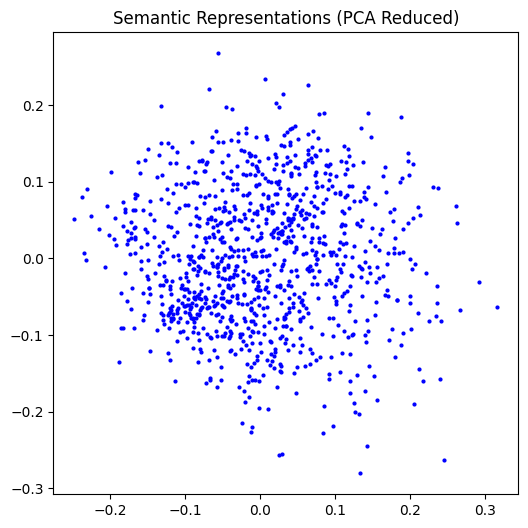

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(encoded_imgs[:1000])

plt.figure(figsize=(6,6))
plt.scatter(reduced[:,0], reduced[:,1], s=4, c="blue")
plt.title("Semantic Representations (PCA Reduced)")
plt.show()
